### Importing Libraries and Packages

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

### Reading Data and Exploratory Analysis

In [2]:
raw_df = pd.read_csv('mushrooms.csv')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:

raw_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [4]:
raw_df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
raw_df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [7]:
raw_df['class'].unique()

array(['p', 'e'], dtype=object)

In [ ]:
raw_df.groupby(['class']).size()

### Encoding Data (Categorical to Numerical) ###

In [8]:
from sklearn.preprocessing import LabelEncoder

def label_encoded(feat: str):
    le = LabelEncoder()
    le.fit(feat)
    print(feat.name,le.classes_)
    return le.transform(feat)

In [9]:
encoded_df = raw_df.copy()

for col in encoded_df.columns:
    encoded_df[col] = label_encoded(encoded_df[col])

class ['e' 'p']
cap-shape ['b' 'c' 'f' 'k' 's' 'x']
cap-surface ['f' 'g' 's' 'y']
cap-color ['b' 'c' 'e' 'g' 'n' 'p' 'r' 'u' 'w' 'y']
bruises ['f' 't']
odor ['a' 'c' 'f' 'l' 'm' 'n' 'p' 's' 'y']
gill-attachment ['a' 'f']
gill-spacing ['c' 'w']
gill-size ['b' 'n']
gill-color ['b' 'e' 'g' 'h' 'k' 'n' 'o' 'p' 'r' 'u' 'w' 'y']
stalk-shape ['e' 't']
stalk-root ['?' 'b' 'c' 'e' 'r']
stalk-surface-above-ring ['f' 'k' 's' 'y']
stalk-surface-below-ring ['f' 'k' 's' 'y']
stalk-color-above-ring ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
stalk-color-below-ring ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
veil-type ['p']
veil-color ['n' 'o' 'w' 'y']
ring-number ['n' 'o' 't']
ring-type ['e' 'f' 'l' 'n' 'p']
spore-print-color ['b' 'h' 'k' 'n' 'o' 'r' 'u' 'w' 'y']
population ['a' 'c' 'n' 's' 'v' 'y']
habitat ['d' 'g' 'l' 'm' 'p' 'u' 'w']


In [10]:
encoded_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


### Correlation and Feature Selection ###

/var/folders/r3/t456r67s4r59fb0fm5ybh3f80000gn/T/ipykernel_8183/2688158591.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  encoded_df.hist(ax=ax)


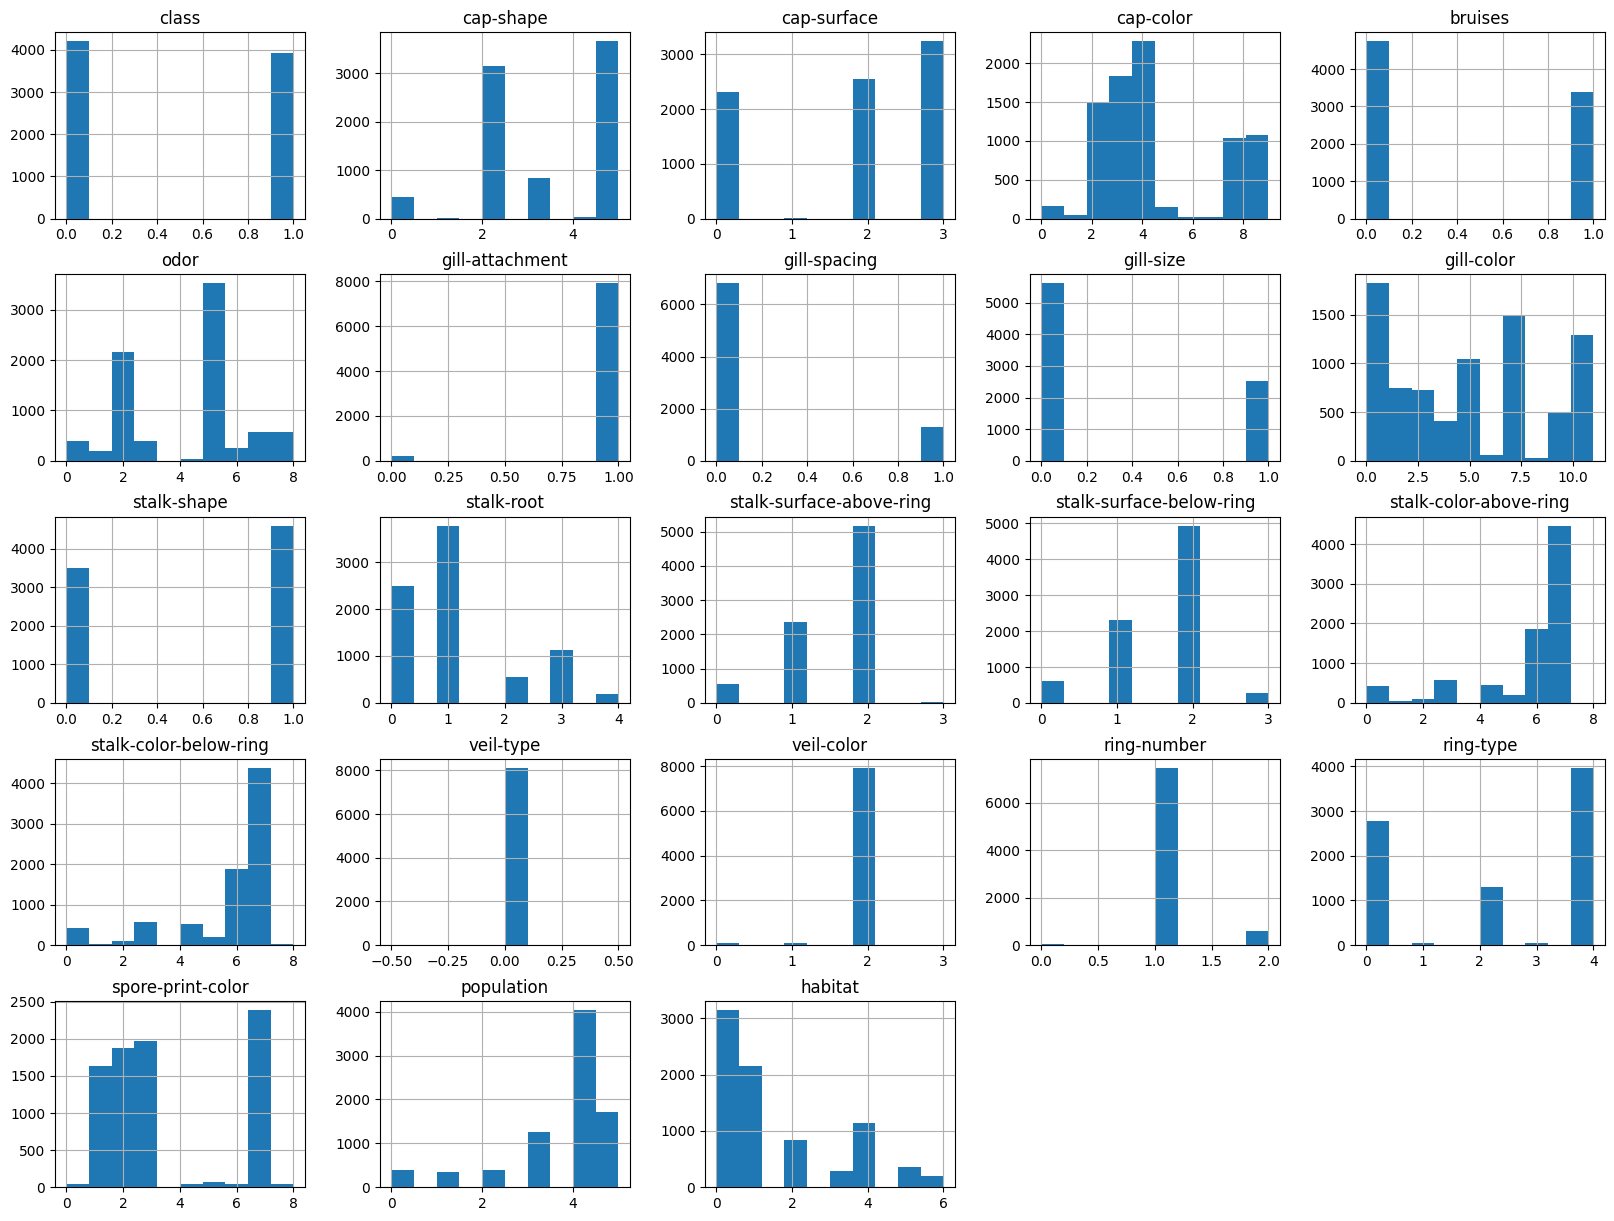

In [11]:
fig = plt.figure(figsize=(20,15))
ax = fig.gca()
encoded_df.hist(ax=ax)
plt.show()

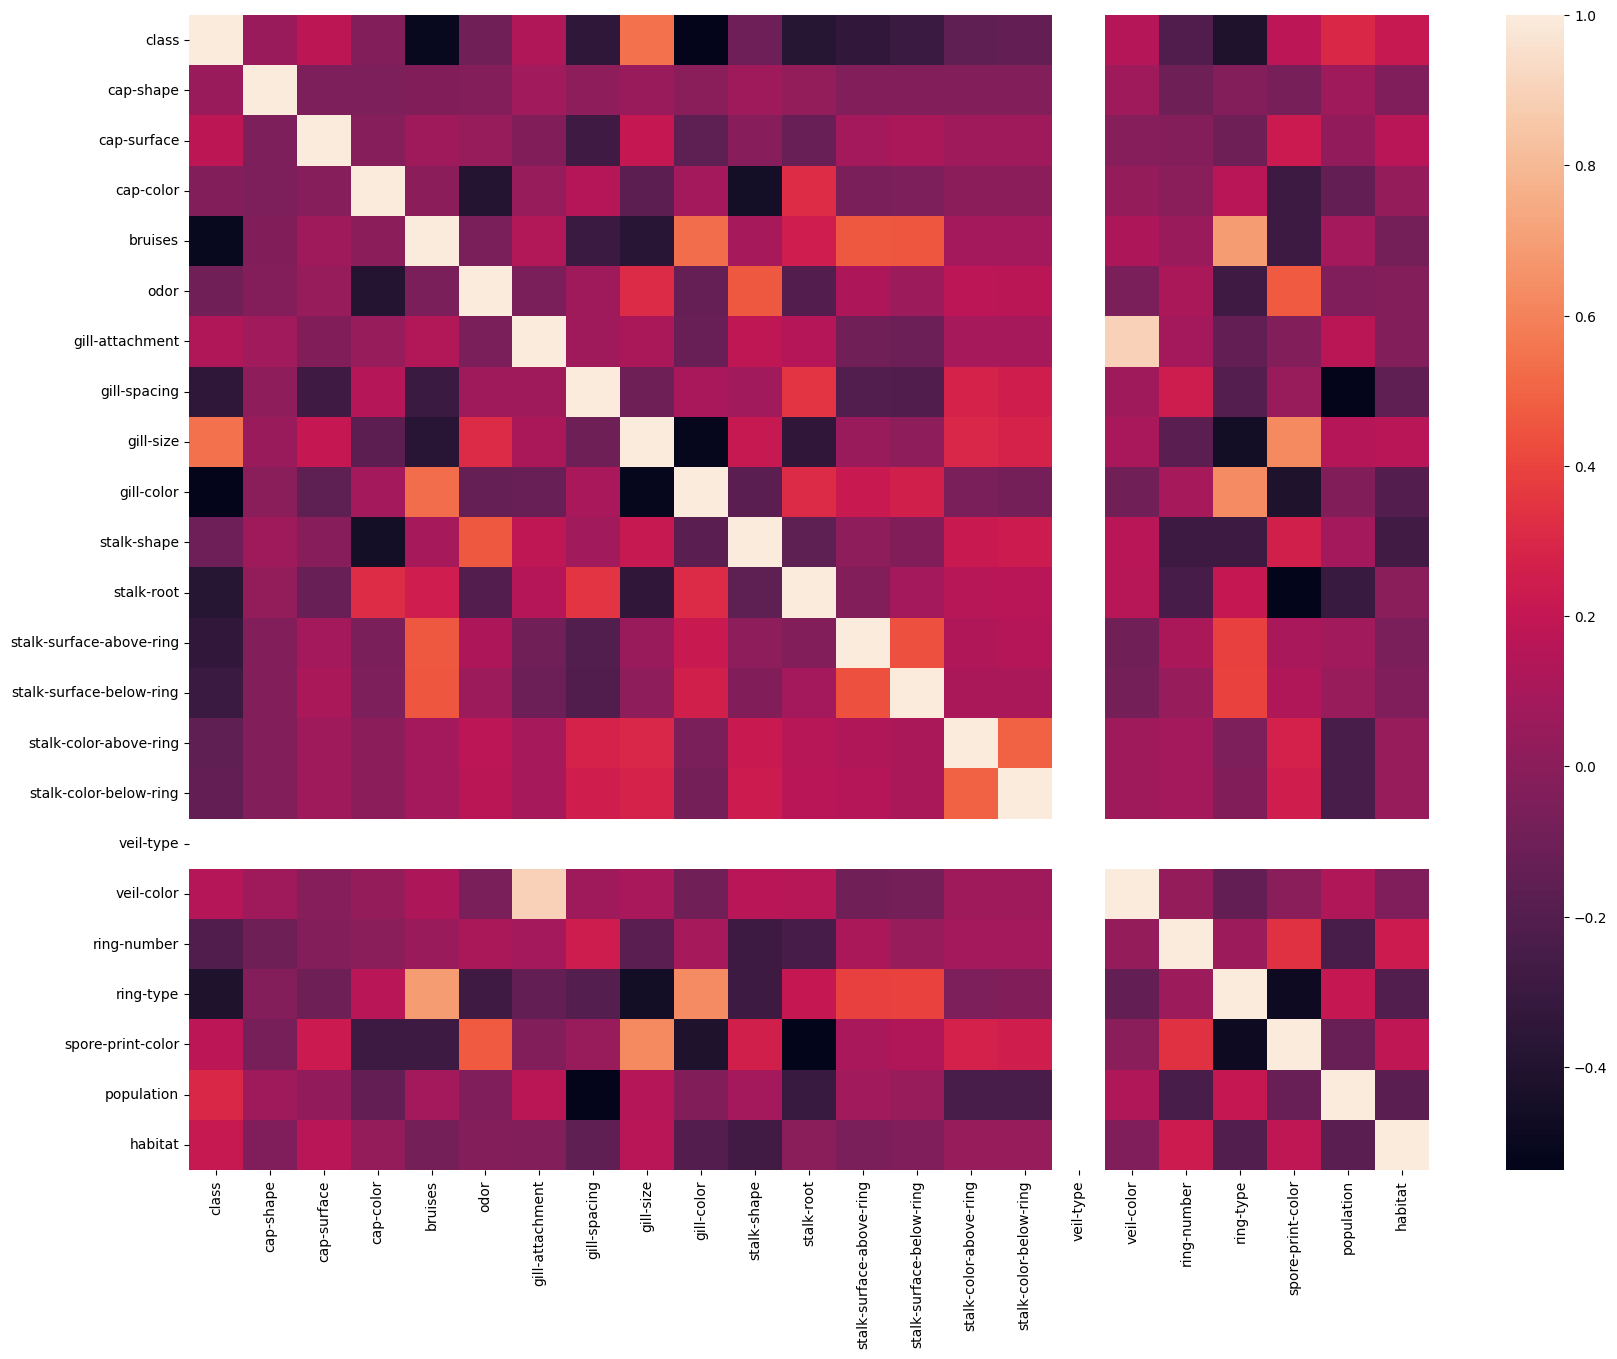

In [12]:
fig = plt.figure(figsize=(20,15))
ax = fig.gca()
sns.heatmap(data=encoded_df.corr(),ax=ax);

In [13]:
corr_matrix = encoded_df.corr().abs()

#just the top correlations related to `class`
corr_matrix_class = corr_matrix['class'].sort_values(ascending=False)
corr_matrix_class


class                       1.000000
gill-size                   0.540024
gill-color                  0.530566
bruises                     0.501530
ring-type                   0.411771
stalk-root                  0.379361
gill-spacing                0.348387
stalk-surface-above-ring    0.334593
stalk-surface-below-ring    0.298801
population                  0.298686
habitat                     0.217179
ring-number                 0.214366
cap-surface                 0.178446
spore-print-color           0.171961
stalk-color-above-ring      0.154003
stalk-color-below-ring      0.146730
veil-color                  0.145142
gill-attachment             0.129200
stalk-shape                 0.102019
odor                        0.093552
cap-shape                   0.052951
cap-color                   0.031384
veil-type                        NaN
Name: class, dtype: float64

In [14]:
#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1) for top correlations unrelated to `class`

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool)).stack().sort_values(ascending=False))
sol.head(20)

gill-attachment           veil-color                  0.897518
bruises                   ring-type                   0.692973
gill-color                ring-type                   0.629398
gill-size                 spore-print-color           0.622991
class                     gill-size                   0.540024
stalk-root                spore-print-color           0.536996
class                     gill-color                  0.530566
gill-spacing              population                  0.529253
bruises                   gill-color                  0.527120
gill-size                 gill-color                  0.516736
class                     bruises                     0.501530
stalk-color-above-ring    stalk-color-below-ring      0.491510
ring-type                 spore-print-color           0.487048
odor                      spore-print-color           0.469055
gill-size                 ring-type                   0.460872
bruises                   stalk-surface-above-ring    0

In [15]:
#Removing the following:
#1. veil-type >> Because it only has one value so it's therefore not meaningful
#2. gill-attahcment >> Because it tracks very closely with `veil-color` and the latter ranks higher in its corr to `class`
#3. ring-type >> Because it tracks closely with `bruises` and `gill-color` and both of those rank higher for corr to `class`

final_df = encoded_df.drop(['veil-type','gill-attachment','ring-type'],axis=1)

### Model Testing And Evaluation ###

In [16]:
X = final_df.drop(['class'],axis=1)
y = final_df['class']

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)

In [18]:
from sklearn import model_selection
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

def run_exps(
    X_train: pd.DataFrame
    ,y_train: pd.DataFrame
    ,X_test: pd.DataFrame
    ,y_test: pd.DataFrame
    ):
    
    '''
    Lightweight script to test many models and find winners
    :param X_train: training split
    :param y_train: training target vector
    :param X_test: test split
    :param y_test: test target vector
    :return: DataFrame of predictions
    '''
    
    dfs = []
    models = [
          ('LogReg', LogisticRegression(max_iter=500)), 
          ('RF', RandomForestClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('SVM', SVC()), 
          ('GNB', GaussianNB()),
          ('XGB', XGBClassifier()),
          ('Catboost', CatBoostClassifier(logging_level='Silent'))
        ]
    results = []
    names = []
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
    labels = [0, 1] # 0 = 'e' and 1 = 'p' before label encoding
    for name, model in models:
            kfold = model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=100)
            cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
            clf = model.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            print(name)
            print(classification_report(y_test, y_pred, labels=labels))
            results.append(cv_results)
            names.append(name)
            this_df = pd.DataFrame(cv_results)
            this_df['model'] = name
            dfs.append(this_df)
            final = pd.concat(dfs, ignore_index=True)
    return final

In [19]:
final = run_exps(X_train, y_train, X_test, y_test)

LogReg
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      3362
           1       0.95      0.94      0.94      3138

    accuracy                           0.95      6500
   macro avg       0.95      0.95      0.95      6500
weighted avg       0.95      0.95      0.95      6500

RF
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3362
           1       1.00      1.00      1.00      3138

    accuracy                           1.00      6500
   macro avg       1.00      1.00      1.00      6500
weighted avg       1.00      1.00      1.00      6500

KNN
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3362
           1       1.00      0.98      0.99      3138

    accuracy                           0.99      6500
   macro avg       0.99      0.99      0.99      6500
weighted avg       0.99      0.99      0.99      6500

SVM
 

In [20]:
final

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted,test_roc_auc,model
0,0.047696,0.006995,0.916923,0.918028,0.916923,0.916767,0.933925,LogReg
1,0.037364,0.005380,0.960000,0.960008,0.960000,0.959995,0.987407,LogReg
2,0.046810,0.005438,0.950769,0.951314,0.950769,0.950716,0.980769,LogReg
3,0.040717,0.005747,0.956923,0.957476,0.956923,0.956871,0.985047,LogReg
4,0.032458,0.005663,0.959877,0.959905,0.959877,0.959882,0.971750,LogReg
5,0.133418,0.024108,1.000000,1.000000,1.000000,1.000000,1.000000,RF
6,0.134510,0.023811,1.000000,1.000000,1.000000,1.000000,1.000000,RF
7,0.133123,0.024437,1.000000,1.000000,1.000000,1.000000,1.000000,RF
8,0.134214,0.023956,1.000000,1.000000,1.000000,1.000000,1.000000,RF
9,0.134120,0.023790,1.000000,1.000000,1.000000,1.000000,1.000000,RF


In [21]:
results_long = pd.melt(final,id_vars=['model'],var_name='metrics',value_name='values')
time_metrics = ['fit_time','score_time'] # fit time metrics

# perfromance metrics
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit time data
results_long_nofit = results_long_nofit.sort_values(by='values')

# time metrics
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit time data
results_long_fit = results_long_fit.sort_values(by='values')

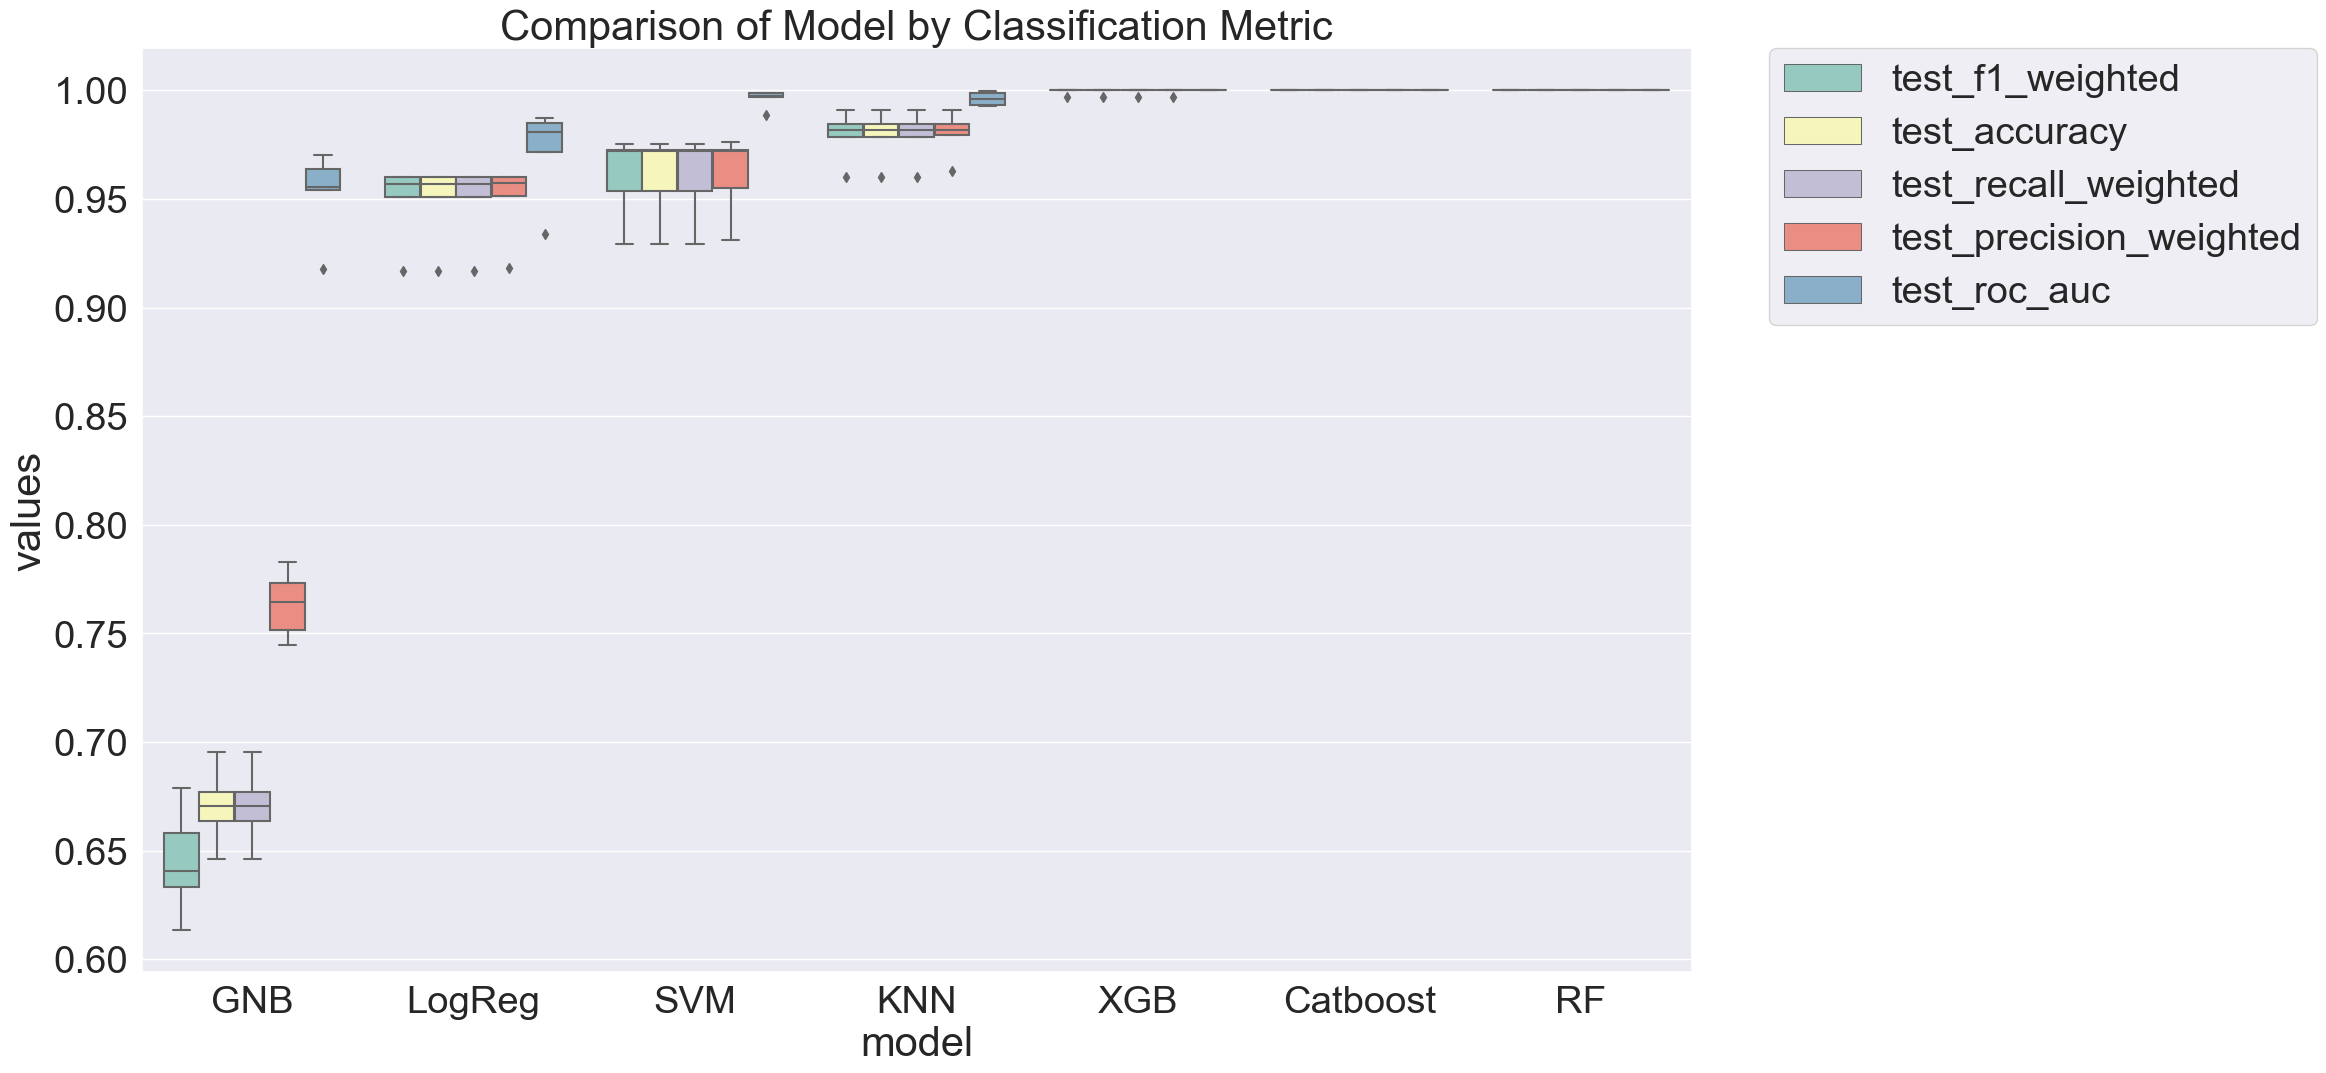

In [22]:
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric')
plt.show()

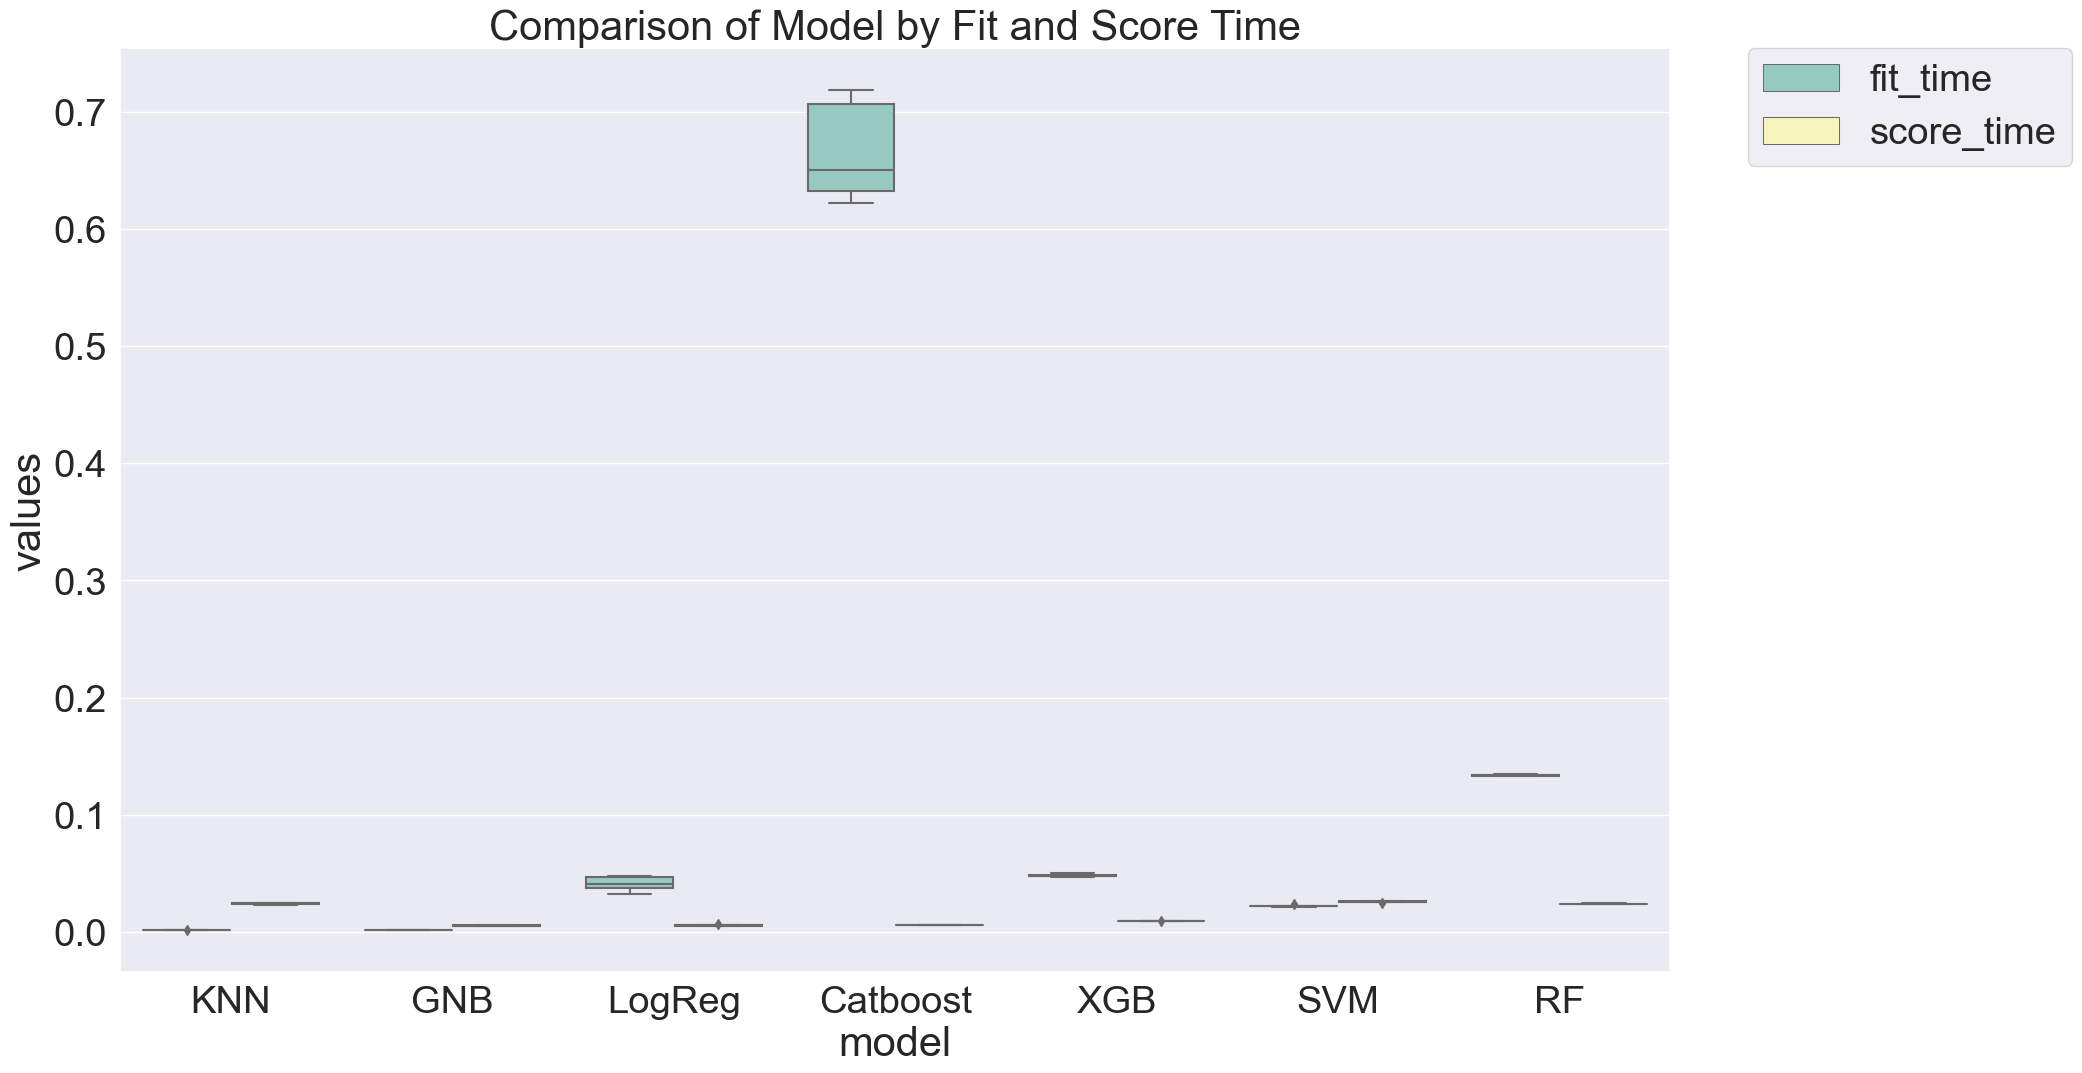

In [23]:
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_fit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Fit and Score Time')
plt.show()